In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [3]:
df = pd.read_csv('../data/housing.csv', delim_whitespace=True, header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


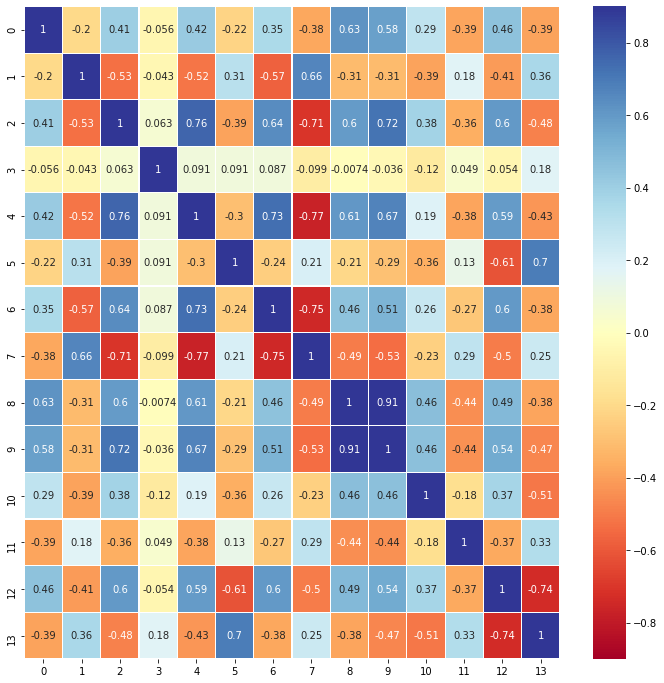

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, linecolor='white', vmax=0.9, vmin=-0.9,
            cmap=plt.cm.RdYlBu, annot=True) # cmap은 matplotlib에서 이미 정해져 있음. annot는 숫자를 보여줌
plt.show()

In [11]:
dataset = df.values
X = dataset[:, :13]
Y = dataset[:, 13]
print(X.shape, Y.shape)

(506, 13) (506,)


In [12]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [18]:
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MAE'])

In [20]:
model.fit(X_train, Y_train, epochs=1000, batch_size=20)

Epoch 1/1000
18/18 [==============================] - 1s 3ms/step - loss: 865.5306 - MAE: 21.9409
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 177.3290 - MAE: 10.2827
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 127.6968 - MAE: 8.5593
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 104.4586 - MAE: 7.4983
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 92.7528 - MAE: 6.9889
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 83.7620 - MAE: 6.6242
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 77.2836 - MAE: 6.1846
Epoch 8/1000
18/18 [==============================] - 0s 3ms/step - loss: 72.5456 - MAE: 6.1413
Epoch 9/1000
18/18 [==============================] - 0s 4ms/step - loss: 69.7050 - MAE: 5.6698
Epoch 10/1000
18/18 [==============================] - 0s 4ms/step - loss: 66.2745 - MAE: 5.7156
Epoch 11/1000
18/18 [============

Epoch 85/1000
18/18 [==============================] - 0s 4ms/step - loss: 30.8002 - MAE: 3.8909
Epoch 86/1000
18/18 [==============================] - 0s 3ms/step - loss: 31.7071 - MAE: 3.9589
Epoch 87/1000
18/18 [==============================] - 0s 3ms/step - loss: 31.3877 - MAE: 3.9153
Epoch 88/1000
18/18 [==============================] - 0s 2ms/step - loss: 31.7166 - MAE: 3.9917
Epoch 89/1000
18/18 [==============================] - 0s 2ms/step - loss: 31.5974 - MAE: 3.9184
Epoch 90/1000
18/18 [==============================] - 0s 2ms/step - loss: 31.4391 - MAE: 3.9804
Epoch 91/1000
18/18 [==============================] - 0s 4ms/step - loss: 31.9704 - MAE: 3.8739
Epoch 92/1000
18/18 [==============================] - 0s 3ms/step - loss: 31.3438 - MAE: 3.8615
Epoch 93/1000
18/18 [==============================] - ETA: 0s - loss: 13.3888 - MAE: 2.82 - 0s 3ms/step - loss: 30.7468 - MAE: 3.8627
Epoch 94/1000
18/18 [==============================] - 0s 3ms/step - loss: 30.5359 - MAE:

18/18 [==============================] - 0s 3ms/step - loss: 24.2118 - MAE: 3.4913
Epoch 169/1000
18/18 [==============================] - 0s 4ms/step - loss: 23.0267 - MAE: 3.4031
Epoch 170/1000
18/18 [==============================] - 0s 3ms/step - loss: 23.2579 - MAE: 3.3644
Epoch 171/1000
18/18 [==============================] - 0s 3ms/step - loss: 23.5768 - MAE: 3.5031
Epoch 172/1000
18/18 [==============================] - 0s 2ms/step - loss: 21.9600 - MAE: 3.3350
Epoch 173/1000
18/18 [==============================] - 0s 2ms/step - loss: 21.1131 - MAE: 3.3258
Epoch 174/1000
18/18 [==============================] - 0s 2ms/step - loss: 21.9675 - MAE: 3.3256
Epoch 175/1000
18/18 [==============================] - 0s 2ms/step - loss: 23.2614 - MAE: 3.4612
Epoch 176/1000
18/18 [==============================] - 0s 3ms/step - loss: 24.4464 - MAE: 3.5893
Epoch 177/1000
18/18 [==============================] - 0s 3ms/step - loss: 21.2543 - MAE: 3.2731
Epoch 178/1000
18/18 [=============

18/18 [==============================] - 0s 4ms/step - loss: 19.5435 - MAE: 3.1394
Epoch 252/1000
18/18 [==============================] - 0s 4ms/step - loss: 16.7956 - MAE: 2.9474
Epoch 253/1000
18/18 [==============================] - 0s 4ms/step - loss: 17.1867 - MAE: 2.9469
Epoch 254/1000
18/18 [==============================] - 0s 3ms/step - loss: 16.5023 - MAE: 2.9046
Epoch 255/1000
18/18 [==============================] - 0s 3ms/step - loss: 17.9065 - MAE: 2.9551
Epoch 256/1000
18/18 [==============================] - 0s 3ms/step - loss: 16.7621 - MAE: 2.9388
Epoch 257/1000
18/18 [==============================] - 0s 3ms/step - loss: 17.3374 - MAE: 2.9138
Epoch 258/1000
18/18 [==============================] - ETA: 0s - loss: 5.3439 - MAE: 1.925 - 0s 3ms/step - loss: 16.6529 - MAE: 2.9077
Epoch 259/1000
18/18 [==============================] - 0s 3ms/step - loss: 17.3560 - MAE: 2.9630
Epoch 260/1000
18/18 [==============================] - 0s 3ms/step - loss: 17.9377 - MAE: 2.94

18/18 [==============================] - 0s 5ms/step - loss: 15.4248 - MAE: 2.7671
Epoch 334/1000
18/18 [==============================] - 0s 4ms/step - loss: 15.8192 - MAE: 2.7820
Epoch 335/1000
18/18 [==============================] - 0s 3ms/step - loss: 16.8584 - MAE: 2.9099
Epoch 336/1000
18/18 [==============================] - 0s 3ms/step - loss: 18.3650 - MAE: 3.0642
Epoch 337/1000
18/18 [==============================] - 0s 3ms/step - loss: 16.4615 - MAE: 2.8096
Epoch 338/1000
18/18 [==============================] - 0s 2ms/step - loss: 16.1595 - MAE: 2.9245
Epoch 339/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.1221 - MAE: 2.7284
Epoch 340/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.5761 - MAE: 2.9012
Epoch 341/1000
18/18 [==============================] - 0s 3ms/step - loss: 17.9418 - MAE: 2.9721
Epoch 342/1000
18/18 [==============================] - 0s 3ms/step - loss: 16.8055 - MAE: 2.9948
Epoch 343/1000
18/18 [=============

18/18 [==============================] - 0s 4ms/step - loss: 14.5902 - MAE: 2.7261
Epoch 417/1000
18/18 [==============================] - 0s 5ms/step - loss: 16.7227 - MAE: 2.8805
Epoch 418/1000
18/18 [==============================] - 0s 4ms/step - loss: 15.8708 - MAE: 2.8476
Epoch 419/1000
18/18 [==============================] - 0s 3ms/step - loss: 14.6195 - MAE: 2.6750
Epoch 420/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.2866 - MAE: 2.7834
Epoch 421/1000
18/18 [==============================] - 0s 5ms/step - loss: 14.1619 - MAE: 2.6545: 0s - loss: 12.1831 - MAE: 2.52
Epoch 422/1000
18/18 [==============================] - 0s 4ms/step - loss: 16.7412 - MAE: 2.9554
Epoch 423/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.6295 - MAE: 2.7483
Epoch 424/1000
18/18 [==============================] - 0s 4ms/step - loss: 15.8496 - MAE: 2.6800
Epoch 425/1000
18/18 [==============================] - 0s 4ms/step - loss: 16.9351 - MAE: 2.9002
Epo

18/18 [==============================] - 0s 6ms/step - loss: 14.9143 - MAE: 2.6992
Epoch 499/1000
18/18 [==============================] - 0s 4ms/step - loss: 13.9952 - MAE: 2.6302
Epoch 500/1000
18/18 [==============================] - 0s 3ms/step - loss: 18.8805 - MAE: 3.0630
Epoch 501/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.9324 - MAE: 2.9423
Epoch 502/1000
18/18 [==============================] - 0s 3ms/step - loss: 14.2163 - MAE: 2.6949
Epoch 503/1000
18/18 [==============================] - 0s 4ms/step - loss: 15.9952 - MAE: 2.8940
Epoch 504/1000
18/18 [==============================] - 0s 3ms/step - loss: 14.8662 - MAE: 2.6902
Epoch 505/1000
18/18 [==============================] - 0s 3ms/step - loss: 13.3492 - MAE: 2.5886
Epoch 506/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.1200 - MAE: 2.6076
Epoch 507/1000
18/18 [==============================] - 0s 3ms/step - loss: 14.4467 - MAE: 2.6570
Epoch 508/1000
18/18 [=============

18/18 [==============================] - 0s 7ms/step - loss: 14.3911 - MAE: 2.6932
Epoch 582/1000
18/18 [==============================] - 0s 4ms/step - loss: 16.5832 - MAE: 2.8921
Epoch 583/1000
18/18 [==============================] - 0s 5ms/step - loss: 14.3998 - MAE: 2.7161
Epoch 584/1000
18/18 [==============================] - 0s 4ms/step - loss: 13.7032 - MAE: 2.6481
Epoch 585/1000
18/18 [==============================] - 0s 5ms/step - loss: 14.3714 - MAE: 2.7041
Epoch 586/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.4441 - MAE: 2.6819
Epoch 587/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.7352 - MAE: 2.7587
Epoch 588/1000
18/18 [==============================] - 0s 3ms/step - loss: 13.6420 - MAE: 2.6126
Epoch 589/1000
18/18 [==============================] - 0s 5ms/step - loss: 15.1545 - MAE: 2.6999
Epoch 590/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.9507 - MAE: 2.7069
Epoch 591/1000
18/18 [=============

18/18 [==============================] - 0s 4ms/step - loss: 13.5208 - MAE: 2.6021
Epoch 665/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.2244 - MAE: 2.6299
Epoch 666/1000
18/18 [==============================] - 0s 3ms/step - loss: 13.0046 - MAE: 2.6248
Epoch 667/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.5609 - MAE: 2.5211
Epoch 668/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.0968 - MAE: 2.4378
Epoch 669/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.3473 - MAE: 2.5093
Epoch 670/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.3220 - MAE: 2.4734
Epoch 671/1000
18/18 [==============================] - 0s 4ms/step - loss: 13.1239 - MAE: 2.5681
Epoch 672/1000
18/18 [==============================] - 0s 3ms/step - loss: 13.4870 - MAE: 2.5408
Epoch 673/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.5992 - MAE: 2.7609
Epoch 674/1000
18/18 [=============

18/18 [==============================] - 0s 4ms/step - loss: 13.8336 - MAE: 2.7117
Epoch 748/1000
18/18 [==============================] - 0s 4ms/step - loss: 12.7750 - MAE: 2.6558
Epoch 749/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.0946 - MAE: 2.4937
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 11.3765 - MAE: 2.3711
Epoch 751/1000
18/18 [==============================] - 0s 4ms/step - loss: 11.9076 - MAE: 2.4534
Epoch 752/1000
18/18 [==============================] - 0s 4ms/step - loss: 11.6781 - MAE: 2.4720
Epoch 753/1000
18/18 [==============================] - 0s 4ms/step - loss: 13.6499 - MAE: 2.6697
Epoch 754/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.1023 - MAE: 2.7249
Epoch 755/1000
18/18 [==============================] - 0s 4ms/step - loss: 14.1068 - MAE: 2.5822
Epoch 756/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.6116 - MAE: 2.5029
Epoch 757/1000
18/18 [=============

18/18 [==============================] - 0s 3ms/step - loss: 12.2862 - MAE: 2.4237
Epoch 831/1000
18/18 [==============================] - 0s 3ms/step - loss: 13.7346 - MAE: 2.6596
Epoch 832/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.5856 - MAE: 2.8296
Epoch 833/1000
18/18 [==============================] - 0s 3ms/step - loss: 11.0972 - MAE: 2.4368
Epoch 834/1000
18/18 [==============================] - 0s 2ms/step - loss: 11.3593 - MAE: 2.3660
Epoch 835/1000
18/18 [==============================] - 0s 3ms/step - loss: 11.3150 - MAE: 2.3711
Epoch 836/1000
18/18 [==============================] - 0s 3ms/step - loss: 15.9687 - MAE: 2.9177
Epoch 837/1000
18/18 [==============================] - 0s 2ms/step - loss: 13.5140 - MAE: 2.7160
Epoch 838/1000
18/18 [==============================] - 0s 2ms/step - loss: 12.1987 - MAE: 2.5422
Epoch 839/1000
18/18 [==============================] - 0s 3ms/step - loss: 14.9500 - MAE: 2.8088
Epoch 840/1000
18/18 [=============

18/18 [==============================] - 0s 4ms/step - loss: 11.4077 - MAE: 2.3454
Epoch 914/1000
18/18 [==============================] - ETA: 0s - loss: 9.0309 - MAE: 2.278 - 0s 6ms/step - loss: 10.3511 - MAE: 2.3082
Epoch 915/1000
18/18 [==============================] - ETA: 0s - loss: 10.7635 - MAE: 2.38 - 0s 3ms/step - loss: 10.7635 - MAE: 2.3899
Epoch 916/1000
18/18 [==============================] - 0s 4ms/step - loss: 10.9671 - MAE: 2.4260
Epoch 917/1000
18/18 [==============================] - 0s 4ms/step - loss: 10.2890 - MAE: 2.3482
Epoch 918/1000
18/18 [==============================] - 0s 5ms/step - loss: 10.5375 - MAE: 2.3469
Epoch 919/1000
18/18 [==============================] - 0s 4ms/step - loss: 10.2199 - MAE: 2.2790
Epoch 920/1000
18/18 [==============================] - 0s 4ms/step - loss: 10.0752 - MAE: 2.2268
Epoch 921/1000
18/18 [==============================] - 0s 3ms/step - loss: 11.3092 - MAE: 2.3798
Epoch 922/1000
18/18 [==============================] - 0

18/18 [==============================] - 0s 3ms/step - loss: 11.1996 - MAE: 2.4741
Epoch 995/1000
18/18 [==============================] - 0s 3ms/step - loss: 12.2471 - MAE: 2.4852
Epoch 996/1000
18/18 [==============================] - 0s 3ms/step - loss: 10.6830 - MAE: 2.3751
Epoch 997/1000
18/18 [==============================] - 0s 5ms/step - loss: 12.8462 - MAE: 2.6015
Epoch 998/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.9583 - MAE: 2.2653
Epoch 999/1000
18/18 [==============================] - 0s 4ms/step - loss: 10.1687 - MAE: 2.3274
Epoch 1000/1000
18/18 [==============================] - 0s 3ms/step - loss: 10.1279 - MAE: 2.3421


In [21]:
result = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(result)

[15.070694923400879, 2.8522145748138428]


In [24]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

(152, 1)


In [26]:
Y_pred = Y_pred.flatten()
print(Y_pred.shape)

(152,)


In [30]:
for i in range(len(Y_test)):
    print('실제값 : %7.4f, 예측값: %7.4f, 오차: %7.4f' %(Y_test[i], Y_pred[i], Y_test[i]-Y_pred[i]) )

실제값 : 33.0000, 예측값: 26.6550, 오차:  6.3450
실제값 : 27.5000, 예측값: 21.3972, 오차:  6.1028
실제값 :  5.6000, 예측값: 10.2714, 오차: -4.6714
실제값 : 21.2000, 예측값: 24.0011, 오차: -2.8011
실제값 : 14.9000, 예측값: 11.7206, 오차:  3.1794
실제값 : 22.3000, 예측값: 25.0050, 오차: -2.7050
실제값 : 18.8000, 예측값: 18.7521, 오차:  0.0479
실제값 : 14.6000, 예측값: 14.7693, 오차: -0.1693
실제값 : 19.4000, 예측값: 25.0566, 오차: -5.6566
실제값 : 32.0000, 예측값: 31.2777, 오차:  0.7223
실제값 : 13.8000, 예측값: 15.6609, 오차: -1.8609
실제값 : 21.7000, 예측값: 22.5801, 오차: -0.8801
실제값 : 22.6000, 예측값: 24.0080, 오차: -1.4080
실제값 : 18.4000, 예측값: 18.3343, 오차:  0.0657
실제값 : 20.5000, 예측값: 19.2292, 오차:  1.2708
실제값 : 22.2000, 예측값: 22.5595, 오차: -0.3595
실제값 : 10.8000, 예측값: 14.1206, 오차: -3.3206
실제값 : 22.5000, 예측값: 19.0796, 오차:  3.4204
실제값 : 13.8000, 예측값: 16.3238, 오차: -2.5238
실제값 :  5.0000, 예측값:  7.9492, 오차: -2.9492
실제값 : 32.9000, 예측값: 28.4682, 오차:  4.4318
실제값 : 18.6000, 예측값: 22.6967, 오차: -4.0967
실제값 : 16.8000, 예측값: 19.6188, 오차: -2.8188
실제값 : 27.1000, 예측값: 19.1272, 오차:  7.9728
실제값 : 22.9000, 예